In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA

%matplotlib inline

In [7]:
image = cv2.imread('./palipsest_imgs/palimpsest-2024.jpg')

### PCA

#### 2 Components

In [8]:
def pca_components_2(image):
    red = image[:,:,2]
    blue = image[:,:,0]

    red_vector = red.reshape(-1, 1)
    blue_vector = blue.reshape(-1, 1)

    data = np.concatenate((red_vector, blue_vector), axis=1)

    pca = PCA(n_components=2)
    pca.fit(data)
    
    p_comps = pca.components_

    comp_1 = np.dot(data, p_comps[0])
    comp_1_norm = (comp_1 - np.min(comp_1)) / (np.max(comp_1) - np.min(comp_1)) * 255
    comp_1_img = comp_1_norm.reshape(red.shape)
    comp_1_img[comp_1_img < 0] = 0
    comp_1_img[comp_1_img > 255] = 255
    comp_1_comb = cv2.merge([comp_1_img, comp_1_img, comp_1_img])

    comp_2 = np.dot(data, p_comps[1])
    comp_2_norm = (comp_2 - np.min(comp_2)) / (np.max(comp_2) - np.min(comp_2)) * 255
    comp_2_img = comp_2_norm.reshape(red.shape)
    comp_2_img[comp_2_img < 0] = 0
    comp_2_img[comp_2_img > 255] = 255
    comp_2_comb = cv2.merge([comp_2_img, comp_2_img, comp_2_img])

    return comp_1_comb.astype(np.uint8), comp_2_comb.astype(np.uint8)

comp_1, comp_2 = pca_components_2(image)

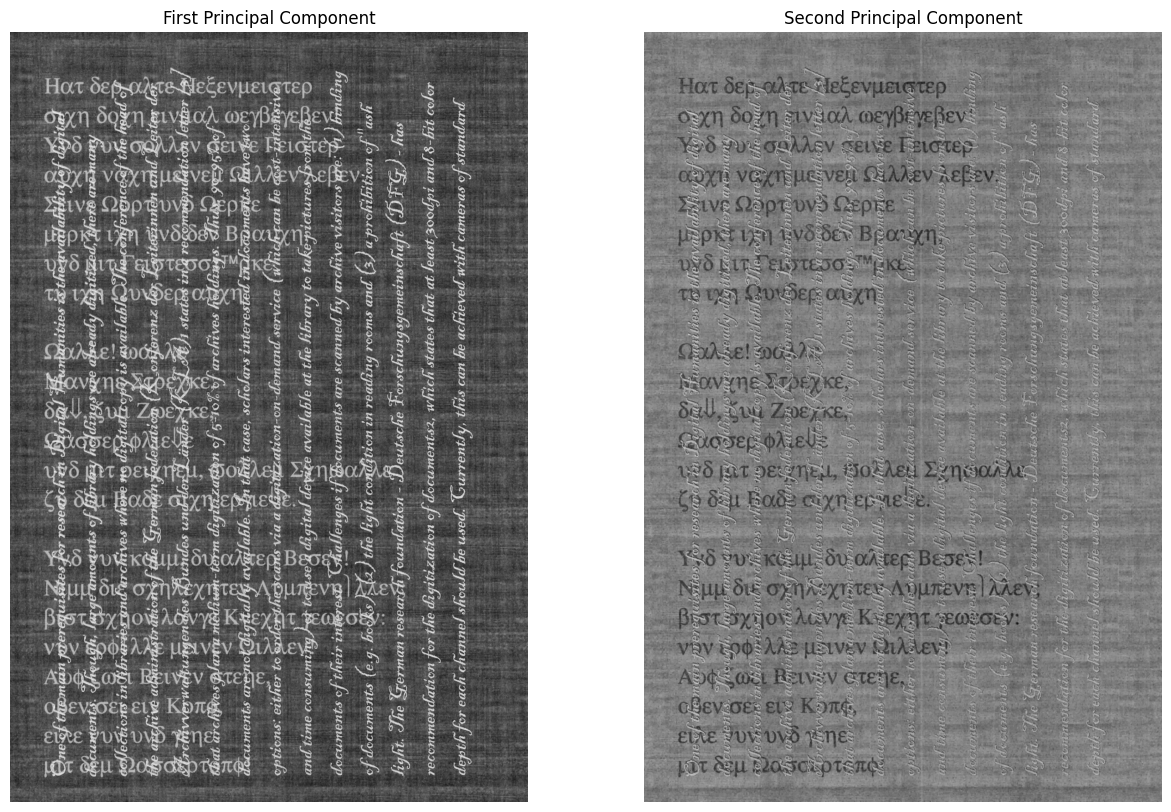

In [9]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(comp_1, cmap='gray')
plt.title('First Principal Component')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(comp_2, cmap='gray')
plt.title('Second Principal Component')
plt.axis('off')

plt.show()

#### 3 Components

In [10]:
def pca_components_3(image):
    red = image[:,:,2]
    green = image[:,:,1]
    blue = image[:,:,0]

    red_vector = red.reshape(-1, 1)
    green_vector = green.reshape(-1, 1)
    blue_vector = blue.reshape(-1, 1)

    data = np.concatenate((red_vector, green_vector, blue_vector), axis=1)

    pca = PCA(n_components=3)
    pca.fit(data)

    p_comps = pca.components_

    comp_1 = np.dot(data, p_comps[0])
    comp_1_norm = (comp_1 - np.min(comp_1)) / (np.max(comp_1) - np.min(comp_1)) * 255
    comp_1_img = comp_1_norm.reshape(red.shape)
    comp_1_img[comp_1_img < 0] = 0
    comp_1_img[comp_1_img > 255] = 255
    comp_1_comb = cv2.merge([comp_1_img, comp_1_img, comp_1_img])

    comp_2 = np.dot(data, p_comps[1])
    comp_2_norm = (comp_2 - np.min(comp_2)) / (np.max(comp_2) - np.min(comp_2)) * 255
    comp_2_img = comp_2_norm.reshape(red.shape)
    comp_2_img[comp_2_img < 0] = 0
    comp_2_img[comp_2_img > 255] = 255
    comp_2_comb = cv2.merge([comp_2_img, comp_2_img, comp_2_img])

    comp_3 = np.dot(data, p_comps[2])
    comp_3_norm = (comp_3 - np.min(comp_3)) / (np.max(comp_3) - np.min(comp_3)) * 255
    comp_3_img = comp_3_norm.reshape(red.shape)
    comp_3_img[comp_3_img < 0] = 0
    comp_3_img[comp_3_img > 255] = 255
    comp_3_comb = cv2.merge([comp_3_img, comp_3_img, comp_3_img])

    return comp_1_comb.astype(np.uint8), comp_2_comb.astype(np.uint8), comp_3_comb.astype(np.uint8)

comp_1, comp_2, comp_3 = pca_components_3(image)


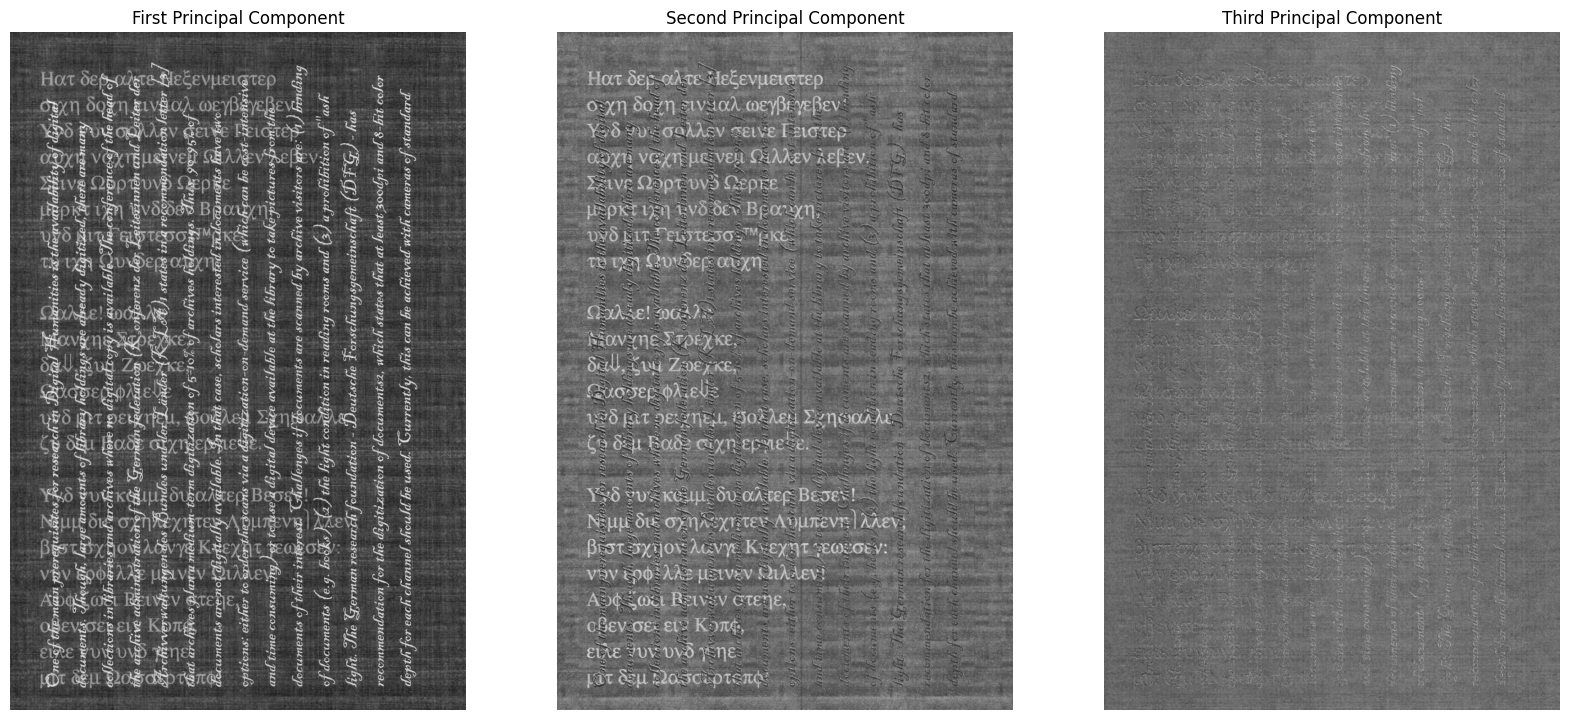

In [11]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(comp_1)
plt.title('First Principal Component')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(comp_2)
plt.title('Second Principal Component')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(comp_3)
plt.title('Third Principal Component')
plt.axis('off')

plt.show()

### ICA

#### 2 Components

In [12]:
def ica_components_2(image):
    red = image[:,:,2]
    blue = image[:,:,0]

    red_vector = red.reshape(-1, 1)
    blue_vector = blue.reshape(-1, 1)

    data = np.concatenate((red_vector, blue_vector), axis=1)

    ica = FastICA(n_components=2)
    components = ica.fit_transform(data)

    components_norm = (components - np.min(components)) / (np.max(components) - np.min(components)) * 255

    comp1_img = components_norm[:, 0].reshape(red.shape)
    comp2_img = components_norm[:, 1].reshape(red.shape)

    comp1_img[comp1_img < 0] = 0
    comp1_img[comp1_img > 255] = 255
    comp2_img[comp2_img < 0] = 0
    comp2_img[comp2_img > 255] = 255

    comp1_combined = cv2.merge([comp1_img, comp1_img, comp1_img])
    comp2_combined = cv2.merge([comp2_img, comp2_img, comp2_img])

    return comp1_combined.astype(np.uint8), comp2_combined.astype(np.uint8)

component1, component2 = ica_components_2(image)

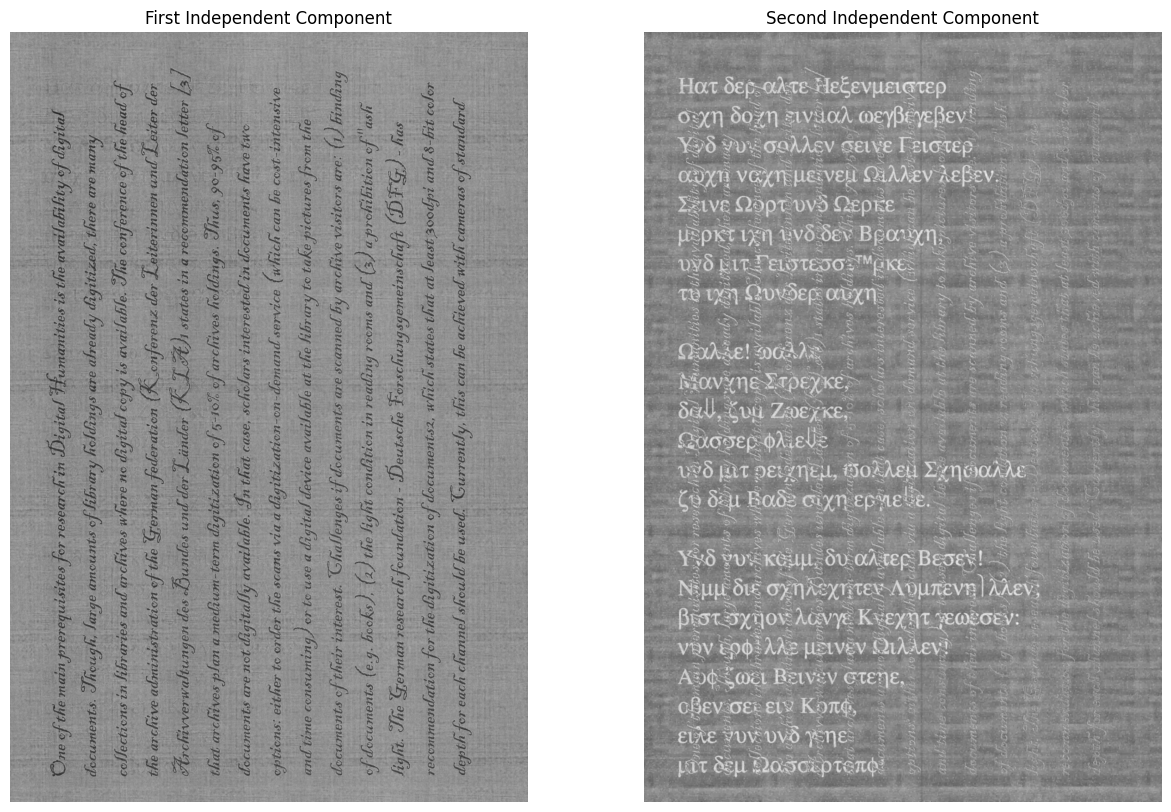

In [13]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(component1, cmap='gray')
plt.title('First Independent Component')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(component2, cmap='gray')
plt.title('Second Independent Component')
plt.axis('off')

plt.show()

#### 3 Components

In [14]:
def ica_components_3(image):
    red = image[:,:,2]
    green = image[:,:,1]
    blue = image[:,:,0]

    red_vector = red.reshape(-1, 1)
    green_vector = green.reshape(-1, 1)
    blue_vector = blue.reshape(-1, 1)

    data = np.concatenate((red_vector, green_vector, blue_vector), axis=1)

    ica = FastICA(n_components=3)
    components = ica.fit_transform(data)

    components_norm = (components - np.min(components)) / (np.max(components) - np.min(components)) * 255

    comp1_img = components_norm[:, 0].reshape(red.shape)
    comp2_img = components_norm[:, 1].reshape(green.shape)
    comp3_img = components_norm[:, 2].reshape(blue.shape)

    comp1_img[comp1_img < 0] = 0
    comp1_img[comp1_img > 255] = 255
    comp2_img[comp2_img < 0] = 0
    comp2_img[comp2_img > 255] = 255
    comp3_img[comp3_img < 0] = 0
    comp3_img[comp3_img > 255] = 255

    comp1_comb = cv2.merge([comp1_img, comp1_img, comp1_img])
    comp2_comb = cv2.merge([comp2_img, comp2_img, comp2_img])
    comp3_comb = cv2.merge([comp3_img, comp3_img, comp3_img])

    return comp1_comb.astype(np.uint8), comp2_comb.astype(np.uint8), comp3_comb.astype(np.uint8)

component1, component2, component3 = ica_components_3(image)

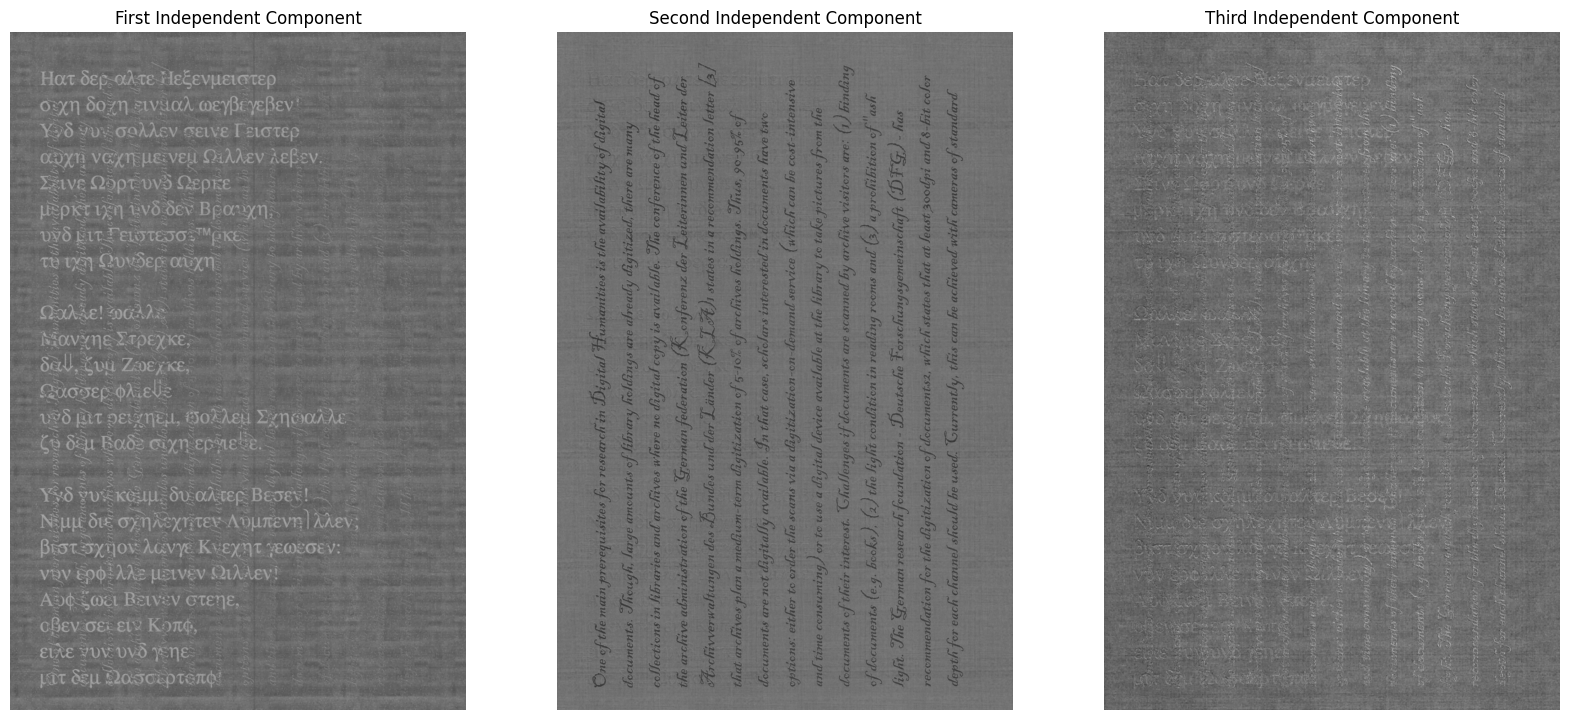

In [15]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(component1)
plt.title('First Independent Component')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(component2)
plt.title('Second Independent Component')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(component3)
plt.title('Third Independent Component')
plt.axis('off')

plt.show()